Accuracy with k=1: 0.6908
Accuracy with k=2: 0.6908
Accuracy with k=3: 0.5841
Accuracy with k=4: 0.5841
Accuracy with k=5: 0.5400
Accuracy with k=6: 0.5400
Accuracy with k=7: 0.5204
Accuracy with k=8: 0.5204
Accuracy with k=9: 0.5095
Accuracy with k=10: 0.5095
Accuracy with k=11: 0.5052


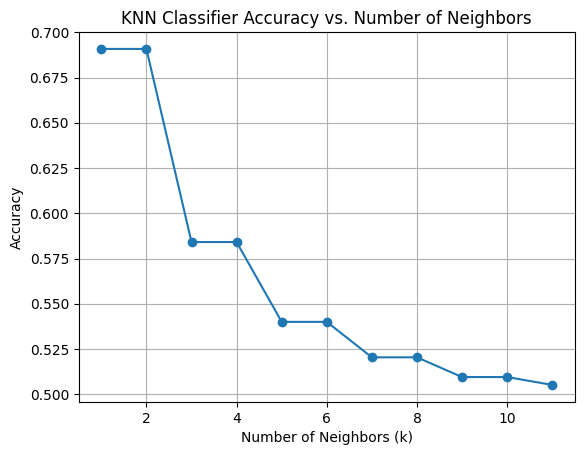

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def main():
    # Load the dataset from the Excel file
    df = pd.read_excel('/content/Book1.xlsx')

    # Strip leading/trailing spaces from column names
    df.columns = df.columns.str.strip()

    # Extract texts from ENGLISH and HINDI columns
    english_texts = df['ENGLISH'].tolist()
    hindi_texts = df['HINDI'].tolist()

    # Create labels for the texts (0 for English, 1 for Hindi)
    english_labels = [0] * len(english_texts)
    hindi_labels = [1] * len(hindi_texts)

    # Combine the texts and labels
    texts = english_texts + hindi_texts
    labels = english_labels + hindi_labels

    # Create a TF-IDF Vectorizer and fit_transform the text data
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts).toarray()

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.3, random_state=42)

    # List to store accuracy scores
    accuracies = []
    k_values = range(1, 12)

    for k in k_values:
        # Train K-Nearest Neighbors classifier with k neighbors
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)

        # Evaluate the classifier on the test set
        accuracy = neigh.score(X_test, y_test)
        accuracies.append(accuracy)
        print(f'Accuracy with k={k}: {accuracy:.4f}')

    # Plot the accuracy vs k
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy vs. Number of Neighbors')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
